In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_9614/518385476.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
titanic_df["embarked_new"] = np.where(titanic_df["Embarked"]=="C","Cherbourg",
                                np.where(titanic_df["Embarked"]=="Q", "Queensland",
                                    "Southampton"))

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton


In [12]:
titanic_df["mr_ms"] = np.where(titanic_df["Name"].str.contains("Mrs."),"Mrs",
                        np.where(titanic_df["Name"].str.contains("Ms."),"Ms","Mr"))

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new,mr_ms
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,Mr
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton,Mr


In [14]:
titanic_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
titanic_df["mr_ms"].value_counts()

mr_ms
Mr     761
Mrs    129
Ms       1
Name: count, dtype: int64

# Basic Plots

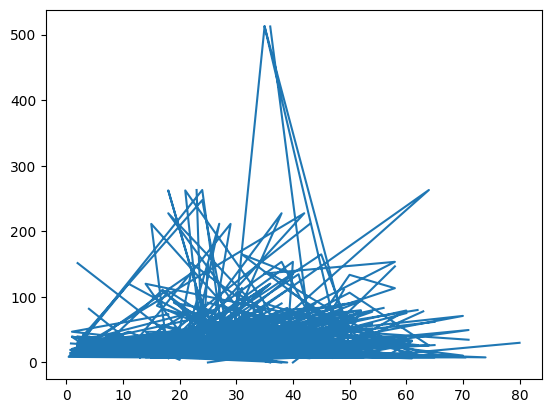

In [16]:
# x- axis, y-axis
plt.plot(titanic_df["Age"],titanic_df["Fare"])

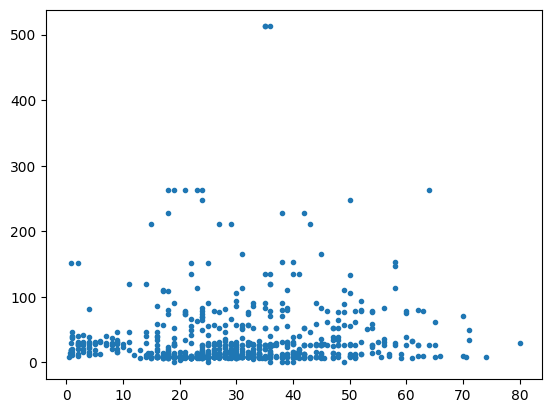

In [19]:
plt.plot(titanic_df["Age"],titanic_df["Fare"],".")

# Histograms

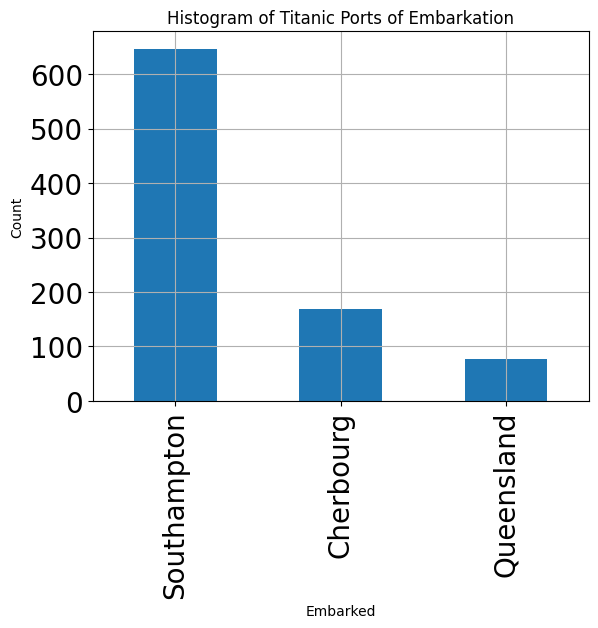

In [25]:
# histograms show us frequency of whatever column we pass in
# in other words: how many records have that value

#pandas plot
embarked_count= titanic_df["embarked_new"].value_counts()

embarked_count.plot(kind="bar")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Histogram of Titanic Ports of Embarkation")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()


# Pie Chart

In [30]:
agg_gender = titanic_df.groupby("Sex").count()
agg_gender

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new,mr_ms
Sex,,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,314,314
male,577,577,577,577,453,577,577,577,577,107,577,577,577


<Axes: ylabel='PassengerId'>

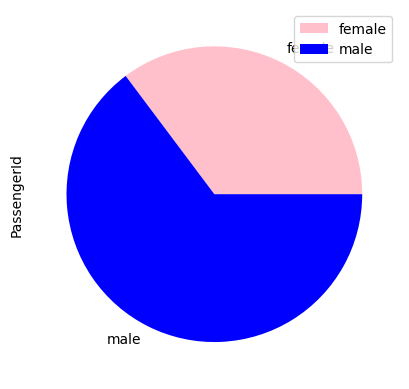

In [31]:
colors = ["pink","blue"]
agg_gender.plot(kind="pie",y = "PassengerId", colors=colors)